# [Uninsured Idiosyncratic Risk and Aggregate Saving](https://www.jstor.org/stable/2118417?seq=1#metadata_info_tab_contents)
* Author: S. Rao Aiyagari
* Source: The Quaterly Journal of Economics, Vol. 109, No. 3 (Aug., 1994), pp. 659-684
* Notebook by Zixuan Huang and Mingzuo Sun
* 2019 Fall

This notebook uses [EconForge/Dolark](http://www.econforge.org/dolark/) toolkit to describe the results and reproduce the tables in the linked paper.

__NOTES:__ This is a preliminart draft. $\texttt{Dolo}$ and $\texttt{Dolark}$ codes have not been completely inserted.

In [1]:
#setup
from dolo import *
import dolark 
from dolark import HModel  #explain why
from dolark.equilibrium import find_steady_state
from dolark.perturbation import perturb   #find variations
from dolo import time_iteration, improved_time_iteration     #time iteration is backward induction
from matplotlib import pyplot as plt
import numpy as np
import math   #numpy has it as well

## Abtract 
* The paper modifies standard growth model to include precautionary saving motives and liquidity constraints. 
* The paper examines the impact of the introduction of a particular kind of uninsurable idiosyncratic risk on the aggregate saving rate; the importance of asset trading to individuals; and the relative inequality of the wealth and income distributions. 

## Introduction

### Paper's Goals 
* To provide an exposition of models whose aggregate behavior is the result of market interaction among a large number of agents subject to idiosyncratic shocks. 
> * This class of models contrasts with representative agent models where individual dynamics and uncertainty coincide with aggregate dynamics and uncertainty. <br/>
> * This exposition is built around the standard growth model of Brock and Mirman(1972) modified to include a role for uninsured idiosyncratic risk and borrowing constraint.
* To use such a model to study the quantitative importance of individual risk for aggregate saving. <br/>


### Key features
* Endogenous heterogeneity 
* Aggregation
* Infinite horizons 
* Exogenous borrowing constraint
* General equilibrium. i.e. interest rate is endogenously determined since in a steady state equilibrium the capital per capita must equal the per capita asset holdings of consumers, and the interest rate must equal the net marginal product of capital. 

## Related Literature
* The Aiyagari model originates from Bewley model and a subsequent literature Zeldes (1989), Deaton (1991), Carroll (1992), and puts these kinds of models into a general equilibrium context. These models all share the same key components as mentioned in the previous part. And they are used to study the following topics:
> * How much of observed wealth inequality does a particular choice of uninsurable idiosyncratic income uncertainty explain? <br/>
> * In this model, what is the fraction of aggregate savings due to the precautionary motive? <br/>
> * In this model, what are the redistributional implications of various policies?


## Model
### The Individual's Problem

\begin{split}
&\max E_0\left(\sum_{t=0}^\infty \beta^t U(c_t)\right)\\
&\text{s.t.}\\
&c_t+a_{t+1}=wl_{t}+(1+r)a_t \\
&c_t\geq0\\
&a_t\geq-\phi
\end{split}


where $\phi$ (if positive) is the limit on borrowing; $l_t$ is assumed to be i.i.d with bounded support given by $[l_{min},l_{max}]$, with $l_{min}>0$; $w$ and $r$ represent wage and interest rate repectively.


* $\hat{a}_t\equiv a_t+\phi$ 
* $z_t \equiv wl_t+(1+r)\hat{a}_t-r\phi$: total resources of the agent at date $t$ respectively. 
* Then the Bellman equation is as follows:
$$
\begin{split}
V(z_t,\phi,w,r) \equiv \underset{\hat{a}_{t+1}}{\max}\left(U(z_t-\hat{a}_{t+1})+\beta \int V(z_{t+1},\phi,w,r)\ dF(l_{t+1})  \right)
\end{split}
$$

* Euler equation: 

\begin{split}
U^\prime (z_t-\hat{a}_{t+1})=\beta(1+r)\int U^\prime (z_{t+1}-\hat{a}_{t+2})\ dF(l_{t+1})
\end{split}

* Decision rule: $\hat{a}_{t+1}=A(z_t,\phi,w,r)$ 
* Law of transition: $z_{t+1}=wl_{t+1}+(1+r)A(z_t,\phi,w,r)-r\phi$

### Firm's problem
\begin{split}
\max F(K,L)-wL-rK
\end{split}



where $K$ is the aggregate capital, $L$ is the aggregate labor, $F(K,L)$ is the production function.

### General Equilibrium
In the steady state, variables are time invariant and all markets are clear, i.e.,
* $F_K(K,L) = r+\delta $
* $F_L(K,L) = w$
* $\int l_i di = L$
* $\int a_i di = K$

In [2]:
# model is written in .yaml file
# HModel reads the yaml file
aggmodel = HModel('Aiyagari.yaml')

# check features of the model   
aggmodel.features

{'ex-ante-identical': True,
 'conditional-processes': False,
 'iid-shocks': False}

## Model Specification, Parameterization, and Consumption

### Model specification and parameters
| Parameter      | Description               | Value           ||
|:------:| ------       | ------    | :------:  |
|$\beta$ | Time Preference Factor | 0.96 | 
| $\delta$ | Depreciation Rate | 0.08 |
| $\alpha$ | Capital Share | 0.36 |
| $\phi$ |     Borrowing Limit | 0 |
| $\mu$ | Risk Aversion Coefficient | {1,3,5} |
| $\rho$ | Serial Correlation of Labor Shocks | {0,0.3,0.6,0.9} |
| $\sigma$ | Variance of Labor Shocks | {0.2,0.4} |



* Production function: Cobb Douglas with the capital share taken to be $\alpha$
\begin{split}
F(K,L) = K^\alpha L^{1-\alpha}
\end{split}
* Utility function: CRRA with the relative risk aversion coefficient $\mu$
* Labor endowment shocks: 
$$
\begin{split}
\log(l_t)=\rho\log(l_{t-1})+\sigma(1-\rho^2)^{\frac{1}{2}}\epsilon_{t}, \ \epsilon_t \sim N(0,1)   
\end{split}
$$


### Computation
After importing the model written in .yaml, we can calculate the equilibrium by using $\texttt{Dolark}$

In [3]:
# baseline caser where coefficient risk aversion is 1
# serial correlation is 0.9 and variance of labor shocks is 0.04
# other values of variables are the same as the those in parameter tables
eq = find_steady_state(aggmodel)

Computing Initial Initial Rule... 

    calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


done
Computing Steady State...done


## Key Results

In [4]:
# data frame of the steay state
df = eq.as_df()

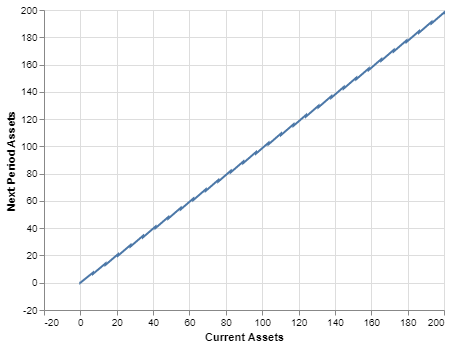

In [5]:
# plot relationship between assets of this period and of next period  
# altair plots a graph
import altair as alt
import pandas as pd

df = eq.as_df()
alt.Chart(df).mark_line().encode(
    x = alt.X('a', axis = alt.Axis(title='Current Assets')),
    y = alt.Y('i', axis=alt.Axis(title='Next Period Assets'))
)

### Aggregate Saving

In [6]:
# extract variables from the steady state solution
a = df['a']
r = df['r']
w = df['w']
e = df['e']
i = df['i']
μ = df['μ']

In [7]:
# generate a column matrix with zeros
c = np.zeros((len(df),1))
income = np.zeros((len(df),1))
agg_c = 0
agg_inc = 0

In [8]:
# calculate consumption
for j in range(len(df)):
    c[j] = (1+r[j])*a[j] + w[j]*math.exp(e[j]) - i[j]

# calculate income
for j in range(len(df)):
    income[j] = (r[j]+0.08)*a[j] + w[j]*math.exp(e[j])

In [9]:
# aggregate consumption and aggregate consumption
for j in range(len(df)):
    agg_c = agg_c + c[j]*μ[j]
    agg_inc = agg_inc + income[j]*μ[j]

In [10]:
# aggregate consumption and income as an output
print(agg_c)
print(agg_inc)

[1.57254408]
[2.07943371]


In [11]:
# saving rate 
# risk aversion: 1; serial correlation: 1, varinace of labor shock: 0.04
saving = 1 - agg_c/agg_inc
saving   

array([0.2437633])

The differences between the saving rates with an without insurance are quite small for moderate and empirically plausible values of $\sigma$, $\rho$, and $\mu$. However for high values of $\sigma$, $\rho$, and $\mu$, the presence of idiosyncratic risk can raise the saving rate quite significantly. 
<img src='Table2.png'>

### Inequality Measures

Text(0.5, 1.0, 'Wealth Distribution by Income')

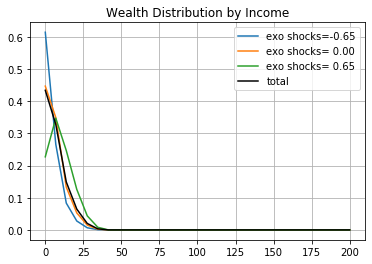

In [12]:
# plot wealth distribution
for i in range(eq.μ.shape[0]):
    s = eq.dr.endo_grid.nodes() # grid for states (i.e the state variable--wealth in this case)
    plt.plot(s, eq.μ[i,:]/(eq.μ[i,:].sum()), label=f"exo shocks={eq.dr.exo_grid.node(i)[2]: .2f}")
plt.plot(s, eq.μ.sum(axis=0), label='total', color='black')
plt.grid()
plt.legend(loc='upper right')
plt.title("Wealth Distribution by Income")

* Since long-run distributions for an individual coincide with cross-section distrbutions for the population, results for variabilities of individual consumption, income, and assets have immediate implications for cross-section distributions. 
* There is much less dispersion across households in consumption compared with income and much greater dispersion in wealth compared with income. 
* Skewness coefficients reveal another aspect of inequality. All of the cross-section distributions are positively skewed (median$<$mean). However, the degree of skewness is less than in the data. 

## Conclusions and Comments
The Aiyagari model extends the Bewley model to a context with a production sector. Deviating from the representative agent model in which complete market is implicitly assumed, it tries to study the aggregate saving behavior of the economy with the agents facing a particular kind of uninsured idiosyncratic risk. With an empirically plausible set of parameters, it finds that the aggregate saving rate does increase compared to the case with a complete market, however, the change here caused by the precautionary saving motive is mild. Also, the results of the model qualitatively match the real data in terms of the ranking of the fluctuations of some economic variables. However, in terms of approaching the real inequalities of income and wealth shown by the data, the model does not perform very well. Also, in this model, the joint distribution of income and wealth is not treated as a state variable, which neglects the distribution effect Krusell and Smith(1998) try to address.